In this kernel, I will look into a dataset containing student performance data acquired from the University of Minho, Portugal. I will be using the student-mat portion of the Dataset.#

In [84]:
#Importing the important libraries for algebra and data processing

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical visualization

import matplotlib.pyplot as plt #matlab plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

#Loading data
data = pd.read_csv("../input/student-mat.csv", sep = ';') #Load the clean training data. Splitter is the semi-colon character

Now we will start exploring the data to see what it has and look at what we can do with it.

In [85]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [86]:
print ('The data has {0} rows and {1} columns'.format(data.shape[0],data.shape[1]))

The data has 395 rows and 33 columns


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [88]:
data.describe() #to look at the numerical fields and their describing mathematical values.

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


From the info available on the data, we can tell that the quality of the data is quite decent as there aren't any columns with null values and every cell has a single piece of data. This will significanlty simplify the processing stage of the data as we would not be required to compensate for null values or split dynamic data. However, there are many categorical fields in the data set and that requires some additional processing to generate better results from.

Next up, we will take the fields (columns) one by one to analyze their importance and effect on the G3 value:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

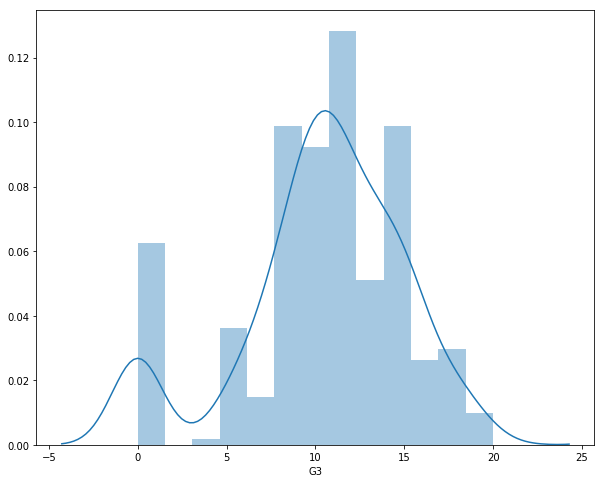

In [89]:
sns.distplot(data['G3']) #Plotting the distribution of the final grades.

From this we can tell that the distribution of the grades is decent and doesn't require any further skewness correction yet. We can go with this distribution for now to analyze the data and create a primitive model and it's error rate first. We can look into data processing of the G3 field afterwards if the results aren't satisfactory. 

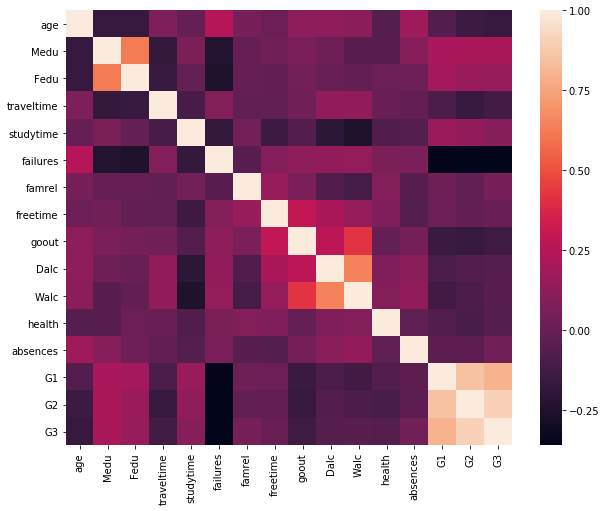

In [90]:
corr = data.corr() # only works on numerical variables.
sns.heatmap(corr)

In [91]:
print (corr['G3'].sort_values(ascending=False), '\n')

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64 



From the correlation graph above, we can look at the numerical fields to know the values that affect the end result the most. Obviously G2 and G1 are the most correlated fields to G3 as they are part of the calculation formula for G3 so they will have the greatest effect on our prediction. 
Another thing we can see is the negative correlation between failures and the G3 result. This also makes quite a lot of sense as more failures tend to negatively affect your end score.
Absences and free time seem to not be very relevant in the dataset that are analyzing which can be a flag that may help us further understand the data in the future. 

Now that we have analyzed the numerical data slightly and figured out the most correlated fields, we now have to take a look at the categorical data to figure out how useful the fields may be and how to introduce them into the prediction model. The simplest way to analyze those fields is to compare the means accross the categories. 

In [92]:
groupColumns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup'
               , 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

avgColumns = ['G3', 'G2', 'G1']

In [93]:
school = data.groupby(groupColumns[0])[avgColumns].mean()
school.head()

,G3,G2,G1
school,,,
GP,10.489971,10.782235,10.939828
MS,9.847826,10.195652,10.673913


From this, we see that Gabriel Pereira students generally do better than Mousinho da Silveira students. The same analysis can be done for a few more fields:

In [94]:
sex = data.groupby(groupColumns[1])[avgColumns].mean()
sex.head()

,G3,G2,G1
sex,,,
F,9.966346,10.389423,10.620192
M,10.914439,11.074866,11.229947


In [95]:
address = data.groupby(groupColumns[2])[avgColumns].mean()
address.head()

,G3,G2,G1
address,,,
R,9.511364,9.829545,10.477273
U,10.674267,10.967427,11.032573


In [96]:
famsize = data.groupby(groupColumns[3])[avgColumns].mean()
famsize.head()

,G3,G2,G1
famsize,,,
GT3,10.177936,10.519573,10.758007
LE3,11.000000,11.192982,11.280702


In [97]:
Pstatus = data.groupby(groupColumns[4])[avgColumns].mean()
Pstatus.head()

,G3,G2,G1
Pstatus,,,
A,11.195122,11.170732,11.073171
T,10.324859,10.661017,10.889831


In [99]:
Mjob = data.groupby(groupColumns[5])[avgColumns].mean()
Mjob.head() #interesting results here. Children of Mothers working in the health industry are doing significantly better than children
            #of Mothers at home or other.

,G3,G2,G1
Mjob,,,
at_home,9.152542,9.677966,10.457627
health,12.147059,12.352941,12.205882
other,9.822695,10.177305,10.177305
services,11.019417,11.213592,11.388350
teacher,11.051724,11.224138,11.534483


In [100]:
Fjob = data.groupby(groupColumns[6])[avgColumns].mean()
Fjob.head()

,G3,G2,G1
Fjob,,,
at_home,10.150000,10.600000,11.700000
health,11.611111,11.388889,11.444444
other,10.193548,10.410138,10.566820
services,10.297297,10.882883,10.828829
teacher,11.965517,12.000000,12.896552


In [101]:
reason = data.groupby(groupColumns[7])[avgColumns].mean()
reason.head() #Interesting here as well

,G3,G2,G1
reason,,,
course,9.820690,10.172414,10.600000
home,10.256881,10.743119,10.816514
other,11.166667,11.222222,10.833333
reputation,11.142857,11.257143,11.457143


In [103]:
guardian = data.groupby(groupColumns[8])[avgColumns].mean()
guardian.head()

,G3,G2,G1
guardian,,,
father,10.688889,11.155556,11.111111
mother,10.483516,10.677656,10.882784
other,9.062500,9.781250,10.562500


In [104]:
schoolsup = data.groupby(groupColumns[9])[avgColumns].mean()
schoolsup.head()

,G3,G2,G1
schoolsup,,,
no,10.561047,10.883721,11.180233
yes,9.431373,9.568627,9.078431


In [105]:
famsup = data.groupby(groupColumns[10])[avgColumns].mean()
famsup.head()

,G3,G2,G1
famsup,,,
no,10.640523,10.993464,11.261438
yes,10.272727,10.537190,10.685950


In [106]:
paid = data.groupby(groupColumns[11])[avgColumns].mean()
paid.head()

,G3,G2,G1
paid,,,
no,9.985981,10.350467,10.789720
yes,10.922652,11.143646,11.049724


In [107]:
activities = data.groupby(groupColumns[12])[avgColumns].mean()
activities.head()

,G3,G2,G1
activities,,,
no,10.340206,10.520619,10.716495
yes,10.487562,10.900498,11.094527


In [108]:
nursery = data.groupby(groupColumns[13])[avgColumns].mean()
nursery.head()

,G3,G2,G1
nursery,,,
no,9.950617,10.209877,10.456790
yes,10.535032,10.843949,11.025478


In [109]:
higher = data.groupby(groupColumns[14])[avgColumns].mean()
higher.head() #another interesting field. 

,G3,G2,G1
higher,,,
no,6.800,7.800000,8.350000
yes,10.608,10.869333,11.045333


In [110]:
internet = data.groupby(groupColumns[15])[avgColumns].mean()
internet.head()

,G3,G2,G1
internet,,,
no,9.409091,9.712121,10.378788
yes,10.617021,10.914894,11.015198


In [111]:
romantic = data.groupby(groupColumns[16])[avgColumns].mean()
romantic.head()

,G3,G2,G1
romantic,,,
no,10.836502,11.011407,10.996198
yes,9.575758,10.121212,10.734848


We can also generate an aggregate summary of the means of the most valuable fields we found: internet, guardian and Fjob

In [112]:
focusGroupColumns = ['internet', 'guardian', 'Fjob']
aggs = data.groupby(focusGroupColumns)[avgColumns].mean()
print(aggs.to_string())

                                   G3         G2         G1
internet guardian Fjob                                     
no       father   health    10.500000  11.000000  10.500000
                  other      7.000000   7.000000   6.800000
                  services  12.500000  12.250000  13.250000
                  teacher   14.000000  13.000000  11.000000
         mother   at_home   12.500000  12.500000  14.000000
                  health    11.000000  10.500000  11.000000
                  other      9.575758   9.939394  10.757576
                  services   7.600000   8.600000   9.400000
                  teacher    7.000000   6.600000   8.200000
         other    at_home   13.000000  13.000000  14.000000
                  other     11.333333  11.333333  11.333333
                  services   6.000000   8.333333   8.333333
yes      father   at_home    8.400000  10.400000  10.400000
                  health    12.400000  11.800000  11.400000
                  other     11.551724  1

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**Model**
Now we will start working on a regression model that we can train and use to predict future records.

In [113]:
X = data.drop('G3', axis=1)
Y = data.G3
X = pd.get_dummies(X) # to convert categorical data to a format that can be used in regression. This isn't the best method to use as it increases the
                      # dimensionality of the dataset but it is a valid place to start
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 58 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
G1                   395 non-null int64
G2                   395 non-null int64
school_GP            395 non-null uint8
school_MS            395 non-null uint8
sex_F                395 non-null uint8
sex_M                395 non-null uint8
address_R            395 non-null uint8
address_U            395 non-null uint8
famsize_GT3          395 non-null uint8
famsize_LE3    

In [114]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42) # splitting data into 80% test and 20% train since the data is quite small. Usually it's best to use 60:40 or something similar
                                                                                              # with the possibility of validation data for certain types of regression models to avoid overfitting.

Lets start with a general linear regression model and see how it goes from there

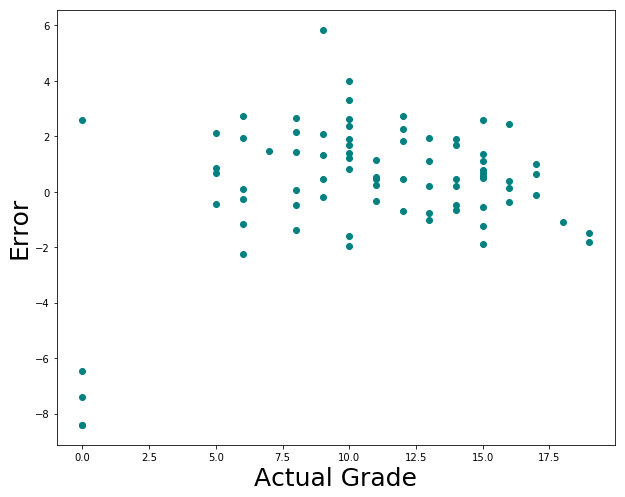

RMSE:
2.37836860474121
Variance score: 0.72


In [115]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
err = Y_test - predicted

plt.scatter(Y_test, err , color ='teal')
plt.xlabel('Actual Grade',fontsize=25)
plt.ylabel('Error',fontsize=25)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Decision Tree

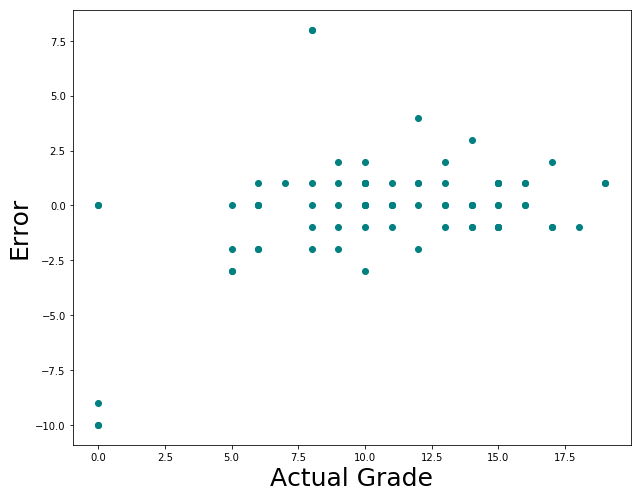

RMSE:
2.6023358543305237
Variance score: 0.67


In [116]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
err = Y_test - predicted

plt.scatter(Y_test, err , color ='teal')
plt.xlabel('Actual Grade',fontsize=25)
plt.ylabel('Error',fontsize=25)


plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

XGBooster Regression

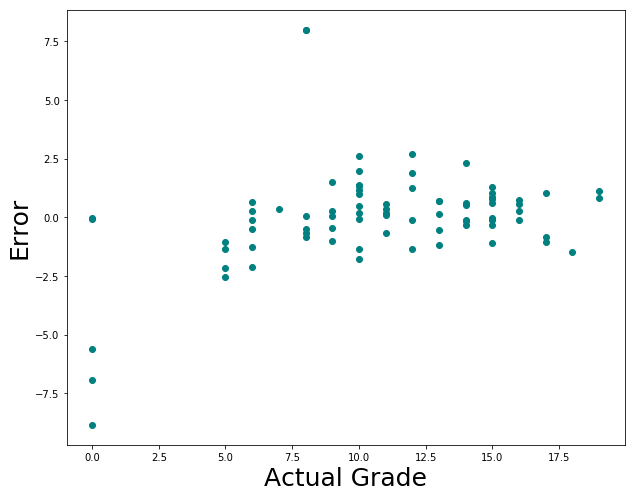

RMSE:
2.16598265466037
Variance score: 0.77


In [119]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='huber', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
err = Y_test - predicted

plt.scatter(Y_test, err , color ='teal')
plt.xlabel('Actual Grade',fontsize=25)
plt.ylabel('Error',fontsize=25)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

KNN Regression

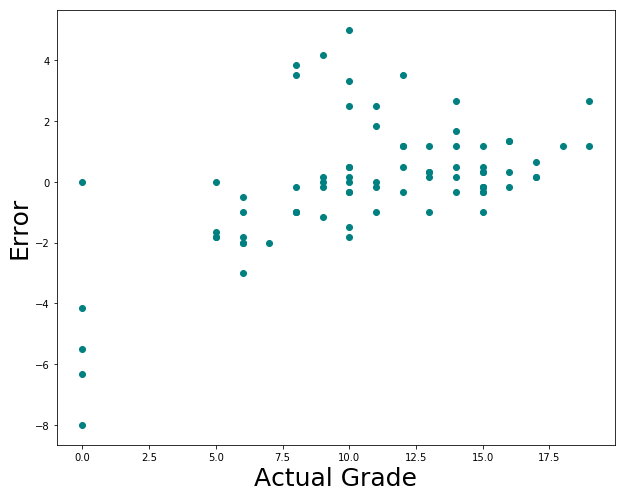

RMSE:
2.079722609438133
Variance score: 0.79


In [118]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
err = Y_test - predicted

plt.scatter(Y_test, err , color ='teal')
plt.xlabel('Actual Grade',fontsize=25)
plt.ylabel('Error',fontsize=25)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Since the KNN Model was the best model we had so far with a variance score of 0.79, we can select it as our current prediction model.

In [ ]:
#Exporting
from sklearn.externals import joblib
#joblib.dump(knn, 'model.pkl') #This will produce a model file that we can import later in a web based python script and possibly take input from a web/mobile application and predict the G3 score